## Importing Libraries

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Inputting and Printing Test Image

(-0.5, 999.5, 599.5, -0.5)

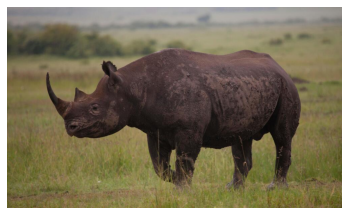

In [23]:
img = cv2.imread('TestImg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

#### Obtaining Image Dimensions

In [3]:
H, W, C = img.shape
print(f"Image height: {H}")
print(f"Image width: {W}")
print(f"Number of image channels: {C}")

Image height: 600
Image width: 1000
Number of image channels: 3


## Q1: Image Resizing

### Nearest Neighbour Interpolation

In [54]:
def NNresize(img, s):
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    i = cv2.resize(img, (int(s*W), int(s*H)), cv2.INTER_NEAREST)
    return i

#### Testing Function

##### Enter scaling factor here (in decimal)

In [60]:
Snn = 0.25

(150, 250, 3)

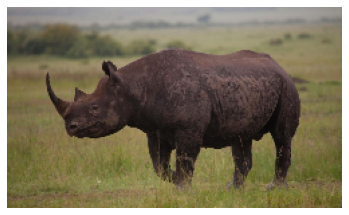

In [61]:
i1 = NNresize(img, Snn)
plt.imshow(i1)
plt.axis('off')
i1.shape                          # should be (s*H, s*W, 3)

#### Using cv2 to display the size difference between original image and resized image

##### NOTE: cv2 plots cannot be used to view images simultaneously. Close the displayed image before running the next cell. 

##### Original Image

In [50]:
cv2.imshow('ImageWindow', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

##### Resized Image

In [62]:
cv2.imshow('ImageWindow', cv2.cvtColor(i1, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

### Bilinear Interpolation

In [53]:
def BIresize(img, s):
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    i = cv2.resize(img, (int(s*W), int(s*H)), cv2.INTER_LINEAR)
    return i

#### Testing Function

##### Enter scaling factor here (in decimal)

In [73]:
Sbi = 1.25

(750, 1250, 3)

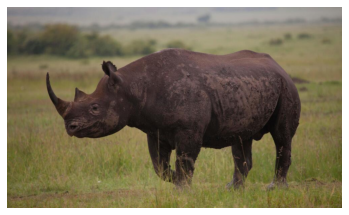

In [74]:
i2 = BIresize(img, Sbi)
plt.imshow(i2)
plt.axis('off')
i2.shape                          # should be (s*H, s*W, 3)

#### Using cv2 to display the size difference between original image and resized image

##### NOTE: cv2 plots cannot be used to view images simultaneously. Close the displayed image before running the next cell. 

##### Original Image

In [76]:
cv2.imshow('ImageWindow', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

In [77]:
cv2.imshow('ImageWindow', cv2.cvtColor(i2, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

## Q2: Image Filtering

#### Convolution Filter

In [89]:
def convfilter(img, k):
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    i = cv2.filter2D(img, -1, k)                             #ddepth = -1 -> same depth as original image  
    return i

#### Testing Function

##### Enter kernel here

In [90]:
K = np.ones((5,5),np.float32)/10

(-0.5, 999.5, 599.5, -0.5)

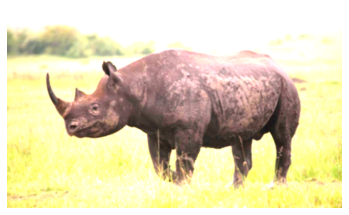

In [91]:
i3 = convfilter(img, K)
plt.imshow(i3)
plt.axis('off')

#### Box Filter

In [111]:
def boxfilter(img, k):
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    i = cv2.boxFilter(img, -1, (k,k))                             #ddepth = -1 -> same depth as original image  
    return i

#### Testing Function

##### Enter kernel size here

In [120]:
Ks = 20

(-0.5, 999.5, 599.5, -0.5)

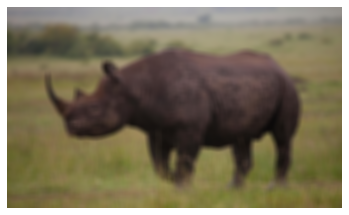

In [121]:
i4 = boxfilter(img, Ks)
plt.imshow(i4)
plt.axis('off')

#### Anti-aliasing Filter

In [122]:
def aafilter(img, k, s):
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    i = cv2.boxFilter(img, -1, (Ks,Ks))                             #ddepth = -1 -> same depth as original image
    i = NNresize(i, s)
    return i

#### Testing Function

##### Enter downsampling factor here

In [126]:
size = 5
Saa = 1/size

(120, 200, 3)

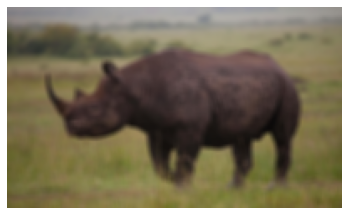

In [130]:
i5 = aafilter(img, Ks, Saa)
plt.imshow(i5)
plt.axis('off')
i5.shape                          # should be ((1/size)*H, (1size)*W, 3)

##### Using cv2 plots to display anti-sliased image

In [131]:
cv2.imshow('ImageWindow', cv2.cvtColor(i5, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

#### High Pass Filter

In [134]:
def hpfilter(img):
    k = np.asarray([[0,-1,0], [-1,4,-1], [0,-1,0]])
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    i = convfilter(img, k)
    return i

#### Testing Function

(-0.5, 999.5, 599.5, -0.5)

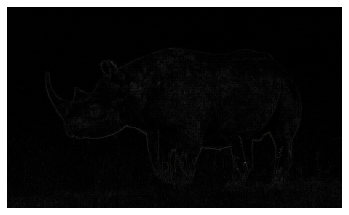

In [135]:
i6 = hpfilter(img)
plt.imshow(i6)
plt.axis('off')

## Q3: Gaussian Filtering

In [147]:
def gfilter(img, sigma, k):
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    i = cv2.GaussianBlur(img, (k,k), sigmaX = sigma)
    return i

#### Testing Function

##### Enter sigma parameter(sigma) here and kersize(KgfS) here. KgfS has to be odd 

In [170]:
sigma = 6
KgfS = 49                               

(-0.5, 999.5, 599.5, -0.5)

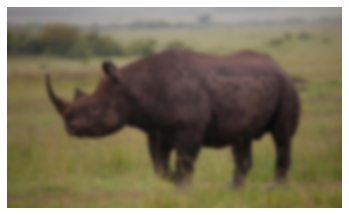

In [171]:
i7 = gfilter(img, sigma, KgfS)
plt.imshow(i7)
plt.axis('off')